<a href="https://www.kaggle.com/code/kunal30122002/image-segmentation-with-unet-on-pet-dataset?scriptVersionId=161302451" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

2024-02-01 13:08:32.045976: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 13:08:32.046102: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 13:08:32.344079: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load Oxford-IIIT Pet Dataset
dataset, info = tfds.load("oxford_iiit_pet:3.*.*", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteV775MC/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteV775MC/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [3]:
# Preprocess the dataset
def preprocess_data(sample):
    try:
        image = tf.image.resize(sample['image'], (128, 128)) / 255.0
        mask = tf.image.resize(sample['segmentation_mask'], (128, 128)) / 255.0
        return image, mask
    except Exception as e:
        print(f"Error processing sample: {e}")
        return None, None

In [4]:
# Filter out None values after preprocessing
train_dataset = dataset['train'].map(preprocess_data).filter(lambda x, y: x is not None).shuffle(1000).batch(32)

In [5]:
# Build the U-Net model
def build_unet(input_shape):
    # Encoder
    inputs = Input(input_shape)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Decoder
    up4 = UpSampling2D(size=(2, 2))(pool3)
    concat4 = concatenate([conv3, up4], axis=-1)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(concat4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)

    up5 = UpSampling2D(size=(2, 2))(conv4)
    concat5 = concatenate([conv2, up5], axis=-1)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)

    up6 = UpSampling2D(size=(2, 2))(conv5)
    concat6 = concatenate([conv1, up6], axis=-1)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)

    # Output layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv6)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (128, 128, 3)
model = build_unet(input_shape)

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=10)


Epoch 1/10


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
I0000 00:00:1706793028.125537      97 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


115/115 [==============================] - 61s 271ms/step - loss: 0.0575 - accuracy: 0.0000e+00
Epoch 2/10


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 33s 279ms/step - loss: 0.0423 - accuracy: 0.0000e+00
Epoch 3/10


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 33s 281ms/step - loss: 0.0423 - accuracy: 0.0000e+00
Epoch 4/10


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 33s 280ms/step - loss: 0.0422 - accuracy: 0.0000e+00
Epoch 5/10


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 33s 281ms/step - loss: 0.0423 - accuracy: 0.0000e+00
Epoch 6/10


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 33s 281ms/step - loss: 0.0422 - accuracy: 0.0000e+00
Epoch 7/10


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 33s 281ms/step - loss: 0.0422 - accuracy: 0.0000e+00
Epoch 8/10


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 34s 282ms/step - loss: 0.0422 - accuracy: 0.0000e+00
Epoch 9/10


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 33s 281ms/step - loss: 0.0422 - accuracy: 0.0000e+00
Epoch 10/10


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 33s 280ms/step - loss: 0.0422 - accuracy: 0.0000e+00


In [7]:
# Example: visualize a prediction
sample = next(iter(train_dataset))
image, mask = sample
prediction = model.predict(image)


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


1/1 [==============================] - 0s 184ms/step


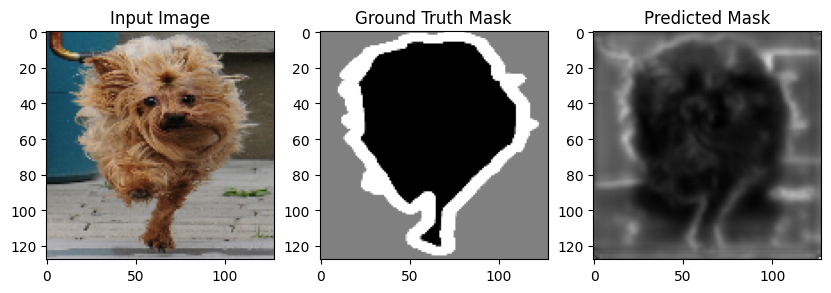

In [8]:

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image[0])
plt.title("Input Image")

plt.subplot(1, 3, 2)
plt.imshow(mask[0][:, :, 0], cmap='gray')
plt.title("Ground Truth Mask")

plt.subplot(1, 3, 3)
plt.imshow(prediction[0][:, :, 0], cmap='gray')
plt.title("Predicted Mask")

plt.show()